In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_raw_data():
    train = pd.read_csv("train_1.csv")
    test = pd.read_csv("key_1.csv")
    return train, test

In [3]:
def transform_data(train, test, periods=-49):
    train_flattened = pd.melt(train[list(train.columns[periods:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
    train_flattened = get_features(train_flattened)
    test['date'] = test.Page.apply(lambda a: a[-10:])
    test['Page'] = test.Page.apply(lambda a: a[:-11])
    test = get_features(test)
    return train_flattened, test

In [4]:
## seems every2_weekdays not used here, just filter it out here!

In [5]:
# https://www.kaggle.com/chechir/weekend-flag-median-with-wiggle/code

In [6]:
def get_features(df):
    df['date'] = df['date'].astype('datetime64[ns]')
#     df['every2_weekdays'] = df.date.dt.dayofweek
    df['weekend'] = (df.date.dt.dayofweek // 5).astype(float)
    #df['shortweek'] = ((df.date.dt.dayofweek) // 4 == 1).astype(float)
    return df

In [7]:
def predict_using_median_weekend(train, test):
    df = train.copy()
#     df = df.drop(['every2_weekdays'], axis=1)
    agg_train_weekend = df.groupby(['Page', 'weekend']).median().reset_index()
    test_df = test.merge(agg_train_weekend, how='left')
    result = test_df['Visits'].values
    return result

In [8]:
def wiggle_preds(df):
    second_term_ixs = df['date'] < '2017-02-01'
    adjusted = df['Visits'].values + df['Visits'].values*0.02
    adjusted[second_term_ixs] = df['Visits'].values[second_term_ixs] + df['Visits'].values[second_term_ixs]*0.04
    df['Visits'] = adjusted
    df.loc[df.Visits.isnull(), 'Visits'] = 0
    return df

In [9]:
train, test = get_raw_data()
# train, test = transform_data(train, test, periods=-49)

In [13]:
import re

def breakdown_topic(str):
    m = re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)', str)
    if m is not None:
        return m.group(1), m.group(2), m.group(3), m.group(4)
    else:
        return "", "", "", ""

In [14]:
page_details = pd.DataFrame(train.Page.apply(breakdown_topic).tolist(), columns=['topic', 'lang', 'access', 'type'])

In [26]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [109]:
mydf = train[train.Page.apply(lambda x: topic_name in x)]

In [110]:
for i in range(len(mydf)):
    print mydf.iloc[i][0]

張赫_(韓國)_zh.wikipedia.org_all-access_spider
張赫_(韓國)_zh.wikipedia.org_all-access_all-agents
張赫_(韓國)_zh.wikipedia.org_desktop_all-agents
張赫_(韓國)_zh.wikipedia.org_mobile-web_all-agents


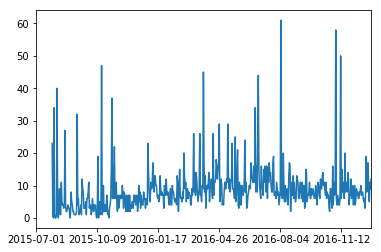

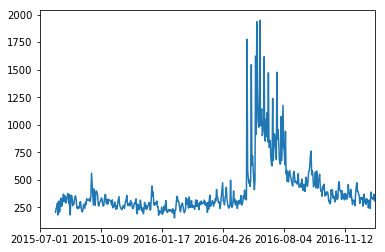

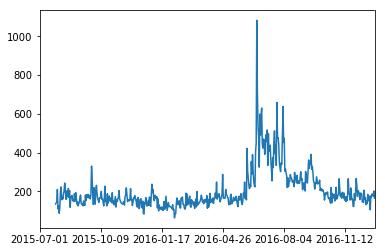

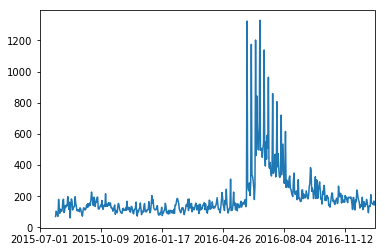

In [111]:
for i in range(len(mydf)):
    plt.figure()
    mydf.iloc[i][1:].plot()

In [63]:
def plot_row(df, i):
    

IndentationError: expected an indented block (<ipython-input-63-9b5ce6556aba>, line 2)

In [23]:
for i in  page_details[page_details.lang == 'zh'].topic[-1000:]:
    print i

金智媛
甲醛
國旗列表
完美鄰居
王俊凯
賴慰玲
亨利·卡維爾
董洁
方馨
棟篤神探
花咲舞無法沉默
無頭騎士異聞錄_DuRaRaRa!!
疯狂的麦克斯：狂暴之路
乌汶叻公主
鄭秀晶
克拉恋人
十三張
五月天
AV女優
葉問2
瑪俐亞
一把青_(電視劇)
古天樂
普密蓬·阿杜德
傑·寇特尼
何雁詩
大白鯊_(電影)
何鴻燊
金所炫
小丑_(漫畫)
2016年香港立法會新界東地方選區補選
瑞典鹽醃鯡魚
不丹
潘迎紫
王樂妍
張天愛
金泰希
骨痛熱症
上海迪士尼樂園
冯克安
共和黨_(美國)
痛风
怪醫黑傑克
奇皇后_(電視劇)
李宗伟
泰国
七夕
高麗太祖
刀劍神域角色列表
柯建銘
腸胃炎
我和殭屍有個約會
奥斯卡·伊萨克
蓮舫
X战警
朱智賢
奥运会项目
秦始皇兵马俑
黃仁德
南柱赫
芈月传
金玉良缘
王思聪
生化危機之變種生還者
安吉丽娜·朱莉
藤井樹
周采詩
莱昂纳多·迪卡普里奥作品名单
霜花店
锂离子电池
金玟錫
511地震預言
楊謹華
吉赛尔·邦辰
甲状腺功能亢进症
隱翅蟲
湯姆克蘭西：全境封鎖
岑麗香
英國郵區編號
李克勤
流行性感冒
皇恩浩蕩
長榮航空
生化危機系列
孫娜恩
家和萬事興_(2010年電視劇)
马约诊所
復興航空222號班機空難
彭于晏
林日曦
朱拉蓬公主
林依晨
美少女戰士角色列表
全智賢
康乃馨_(電視劇)
荷魯斯之眼
俄罗斯
曾莞婷
爵迹
莊智淵
東星大樓
李安
柯文哲
神盾局特工
臺灣同性婚姻
李雪主
黎耀祥
幸福蒲公英
烏龍派出所
任家萱
劫_(围棋)
織田信長
大上海
赵云
阴茎
金雪炫_(歌手)
實習天使
瑪麗莎·托梅
露娜·羅古德
范雲_(臺灣)
秦国
离婚律师
姜素拉
李寶英
伊丽莎白二世
神鬼認證4
追逐繁星的孩子
新少林寺_(电影)
美國隊長3：英雄內戰
沈世朋
S.E.S._(組合)
李荷娜
诗丽吉王后
鄭智薰
鄭中基
洪仲丘事件
九皇大帝
世上哪裡都找不到的善良男人
蒂達·史雲頓
江～公主們的戰國～
流氓皇帝
傑西·艾森柏格
芈戎
軒轅劍之天之痕
數碼暴龍大冒險tri.
台灣
血族_(2014年美国电视剧)
王鸥
時完
新北市
六七暴動
洪欣
林峯
玖壹壹
2016年二十国集团杭州峰会
玩命關頭8
北極振盪
偶像来了
卡尔·兰德施泰纳
密探
南宮珉
馬份
戀仲
愛上花豹女
2016年電影列表
鄧佳華
巨輪II
神鬼

In [25]:
page_details.loc[page_details.topic == '偽裝者_(2015年電視劇)']

,topic,lang,access,type
3478,偽裝者_(2015年電視劇),zh,all-access,spider
31443,偽裝者_(2015年電視劇),zh,all-access,all-agents
64000,偽裝者_(2015年電視劇),zh,desktop,all-agents
108634,偽裝者_(2015年電視劇),zh,mobile-web,all-agents


In [12]:
# page_details = tmp

In [13]:
train_df = pd.concat([page_details, train], axis=1)

In [14]:
train_df.shape

(145063, 555)

In [15]:
def get_train_validate_set(train_df, test_percent):
    train_end = math.floor((train_df.shape[1]-5) * (1-test_percent))
    train_ds = train_df.iloc[:, np.r_[0,1,2,3,4,5:train_end]]
    test_ds = train_df.iloc[:, np.r_[0,1,2,3,4,train_end:train_df.shape[1]]]
    
    return train_ds, test_ds

X_train, y_train = get_train_validate_set(train_df, 0.1)


In [16]:
X_train.head()

,topic,lang,access,type,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,2016-11-01
0,2NE1,zh,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,...,26.0,25.0,16.0,19.0,20.0,12.0,19.0,50.0,16.0,30.0
1,2PM,zh,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,...,25.0,19.0,15.0,21.0,21.0,27.0,33.0,15.0,24.0,13.0
2,3C,zh,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,...,6.0,5.0,5.0,2.0,3.0,3.0,2.0,2.0,6.0,1.0
3,4minute,zh,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,...,9.0,13.0,21.0,13.0,10.0,21.0,15.0,103.0,22.0,15.0
4,52_Hz_I_Love_You,zh,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,4.0,173.0,5.0,10.0,10.0,18.0,20.0,11.0


In [17]:
y_train.head()

,topic,lang,access,type,Page,2016-11-02,2016-11-03,2016-11-04,2016-11-05,2016-11-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,25.0,14.0,20.0,8.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,26.0,11.0,21.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access,spider,3C_zh.wikipedia.org_all-access_spider,3.0,3.0,3.0,2.0,10.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,12.0,11.0,15.0,7.0,12.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5.0,6.0,33.0,13.0,10.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [18]:
X_train.shape, y_train.shape

((145063, 495), (145063, 65))

In [37]:
# tmp

In [38]:
## split data into training and validation set

In [46]:
# train, validate = np.split(train_df.sample(frac=1), [int(.9*len(train_df))])

In [ ]:
# train, test = get_raw_data()
# train, test = transform_data(train, test, periods=-28)
# preds_weekend = predict_using_median_weekend(train, test)
# train, test = get_raw_data()
# train, test = transform_data(train, test, periods=-14)
# preds_otherdays = predict_using_median_weekend(train, test)

# weight = 0.9
# preds_ensemble = preds_weekend*weight + preds_otherdays*(1-weight)
# test['Visits'] = preds_ensemble
# test = wiggle_preds(test)

# test[['Id','Visits']].to_csv('sub_mads_weight_{}.csv'.format(weight), index=False)
# print(test[['Id', 'Visits']].head(10))
# print(test[['Id', 'Visits']].tail(10))

## A.SMAPE

In [19]:
def smape(predict, actual, debug=False):
    '''
    predict and actual is a panda series.
    In this implementation I will skip all the datapoint with actual is null
    '''
    actual = actual.fillna(0)
    data = pd.concat([predict, actual], axis=1, keys=['predict', 'actual'])
    data = data[data.actual.notnull()]
    if debug:
        print('debug', data)
    
    evals = abs(data.predict - data.actual) * 1.0 / (abs(data.predict) + abs(data.actual)) * 2
    evals[evals.isnull()] = 0
    #print(np.sum(evals), len(data), np.sum(evals) * 1.0 / len(data))
    
    result = np.sum(evals) / len(data)
    
    return result

# create testing series
testing_series_1 = X_train.iloc[0, 5:494]
testing_series_2 = X_train.iloc[0, 5:494].shift(-1)
testing_series_3 = X_train.iloc[1, 5:494]
testing_series_4 = pd.Series([0,0,0,0])

In [20]:
random_series_1 = pd.Series(np.repeat(3, 500))
random_series_2 = pd.Series(np.random.normal(3, 1, 500))
random_series_3 = pd.Series(np.random.normal(500, 20, 500))
random_series_4 = pd.Series(np.repeat(500, 500))

# testing 1 same series
print("\nSMAPE score to predict a constant array of 3")
print("Score (same series): %.3f" % smape(random_series_1, random_series_1))
print("Score (same series - 1) %.3f" % smape(random_series_1, random_series_1-1))
print("Score (same series + 1) %.3f" % smape(random_series_1, random_series_1+1))

# testing 2 same series shift by one
print("\nSMAPE score to predict a array of normal distribution around 3")
print("Score (random vs mean) %.3f" % smape(random_series_2, random_series_1))
print("Score (random vs mean-1) %.3f" % smape(random_series_2, random_series_2-1))
print("Score (random vs mean+1) %.3f" % smape(random_series_2, random_series_2+1))
print("Score (random vs mean*0.9) %.3f" % smape(random_series_2, random_series_2*0.9))
print("Score (random vs mean*1.1) %.3f" % smape(random_series_2, random_series_2*1.1))

# testing 3 totally different series
print("\nSMAPE score to predict a array of normal distribution around 500")
print("Score (random vs mean) %.3f" % smape(random_series_3, random_series_4))
print("Score (random vs mean-20) %.3f" % smape(random_series_3, random_series_3-20))
print("Score (random vs mean+20) %.3f" % smape(random_series_3, random_series_3+20))
print("Score (random vs mean*0.9) %.3f" % smape(random_series_3, random_series_3*0.9))
print("Score (random vs mean*1.1) %.3f" % smape(random_series_3, random_series_3*1.1))


SMAPE score to predict a constant array of 3
Score (same series): 0.000
Score (same series - 1) 0.400
Score (same series + 1) 0.286

SMAPE score to predict a array of normal distribution around 3
Score (random vs mean) 0.289
Score (random vs mean-1) 0.463
Score (random vs mean+1) 0.307
Score (random vs mean*0.9) 0.105
Score (random vs mean*1.1) 0.095

SMAPE score to predict a array of normal distribution around 500
Score (random vs mean) 0.031
Score (random vs mean-20) 0.041
Score (random vs mean+20) 0.039
Score (random vs mean*0.9) 0.105
Score (random vs mean*1.1) 0.095


In [ ]:
# ## LB 45.0 version
# import pandas as pd
# import numpy as np

# train = pd.read_csv("../input/train_1.csv")
# train_flattened = pd.melt(train[list(train.columns[-49:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
# train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
# train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

# test = pd.read_csv("../input/key_1.csv")
# test['date'] = test.Page.apply(lambda a: a[-10:])
# test['Page'] = test.Page.apply(lambda a: a[:-11])
# test['date'] = test['date'].astype('datetime64[ns]')
# test['weekend'] = ((test.date.dt.dayofweek) // 5 == 1).astype(float)

# train_page_per_dow = train_flattened.groupby(['Page','weekend']).median().reset_index()

# test = test.merge(train_page_per_dow, how='left')
# test.loc[test.Visits.isnull(), 'Visits'] = 0

# test[['Id','Visits']].to_csv('mad.csv', index=False)

In [23]:
def extract_series(df, row_num, start_idx):
    y = df.iloc[row_num, start_idx:]
    df = pd.DataFrame({ 'ds': y.index, 'y': y.values})
    return df

In [24]:
def median_model(df_train, df_actual, p, review=False, figSize=(12, 4)):
    
    def nanmedian_zero(a):
        return np.nan_to_num(np.nanmedian(a))
    
    df_train['y'] = df_train['y'].convert_objects(convert_numeric=True)
    df_actual['y'] = df_actual['y'].convert_objects(convert_numeric=True)
    visits = nanmedian_zero(df_train['y'].values[-p:])
    train_series = df_train['y']
    train_series.index = df_train.ds
    
    idx = np.arange( p) + np.arange(len(df_train)- p+1)[:,None]
    b = [row[row>=0] for row in df_train.y.values[idx]]
    pre_forecast = pd.Series(np.append(([float('nan')] * (p-1)), list(map(nanmedian_zero,b))))
    pre_forecast.index = df_train.ds
    
    forecast_series = pd.Series(np.repeat(visits, len(df_actual)))
    forecast_series.index = df_actual.ds
    
    forecast_series = pre_forecast.append(forecast_series)
    
    actual_series = df_actual.y
    actual_series.index = df_actual.ds
    
    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='Median model')
    
    return smape(forecast_series, actual_series)

In [26]:
def plot_prediction_and_actual_2(train, forecast, actual, xlim=None, ylim=None, figSize=None, title=None):
    fig, ax  = plt.subplots(1,1,figsize=figSize)
    ax.plot(pd.to_datetime(train.index), train.values, 'k.')
    ax.plot(pd.to_datetime(actual.index), actual.values, 'r.')
    ax.plot(pd.to_datetime(forecast.index), forecast.values, 'b-')
    ax.set_title(title)
    plt.show()

                                    Page  2015-07-01  2015-07-02  2015-07-03  \
2  3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0   

   2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  \
2         1.0         0.0         4.0         0.0         3.0         4.0   

      ...      2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
2     ...             3.0         1.0         1.0         7.0         4.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
2         4.0         6.0         3.0         4.0        17.0  

[1 rows x 551 columns]


/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


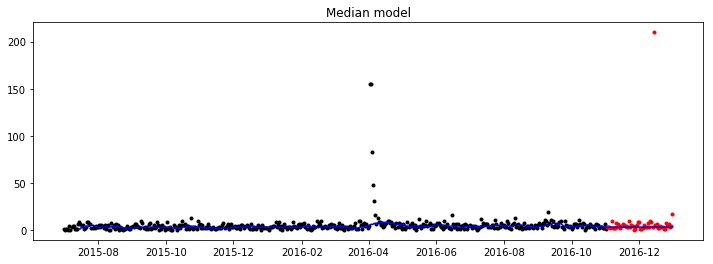

The SMAPE score is : 0.50096


In [31]:
# This is to demo the median model
print(train.iloc[[2]])

df_train = extract_series(X_train, 2, 5)
df_actual = extract_series(y_train, 2, 5)
lang = X_train.iloc[2, 1]
score = median_model(df_train.copy(), df_actual.copy(), 15, review=True)
print("The SMAPE score is : %.5f" % score)

In [34]:
# holiday variable
#holiday_en = ['2015-01-01', '2015-01-19', '2015-04-03', '2015-05-04', '2015-05-25', '2015-07-01', '2015-07-03', '2015-09-07', '2015-11-26', '2015-11-27', '2015-12-25', '2015-12-26', '2015-12-28', '2016-01-01', '2016-01-18', '2016-03-25', '2016-05-02', '2016-05-30', '2016-07-01', '2016-07-04', '2016-09-05', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-16', '2017-04-14', '2017-05-01', '2017-05-29', '2017-07-01', '2017-07-03', '2017-07-04', '2017-09-04', '2017-11-10', '2017-11-23', '2017-12-25', '2017-12-26']

holiday_en_us = ['2015-01-01', '2015-01-19', '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26', '2015-11-27', '2015-12-25', '2016-01-01', '2016-01-18', '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-11', '2016-11-24', '2016-12-26', '2017-01-01', '2017-01-02', '2017-01-16', '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-10', '2017-11-23', '2017-12-25']
holiday_en_uk = ['2015-01-01', '2015-04-03', '2015-05-04', '2015-05-25', '2015-12-25', '2015-12-26', '2015-12-28', '2016-01-01', '2016-03-25', '2016-05-02', '2016-05-30', '2016-12-26', '2016-12-27', '2017-01-01', '2017-04-14', '2017-05-01', '2017-05-29', '2017-12-25', '2017-12-26']
holiday_en_canada = ['2015-01-01', '2015-07-01', '2015-09-07', '2015-12-25', '2016-01-01', '2016-07-01', '2016-09-05', '2016-12-25', '2017-01-01', '2017-07-01', '2017-07-03', '2017-09-04', '2017-12-25']

holiday_ru_russia = ['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-02-23', '2015-03-09', '2015-05-01', '2015-05-04', '2015-05-09', '2015-05-11', '2015-06-12', '2015-11-04', '2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-02-22', '2016-02-23', '2016-03-08', '2016-05-01', '2016-05-09', '2016-06-12', '2016-06-13', '2016-11-04', '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-02-23', '2017-02-24', '2017-03-08', '2017-05-01', '2017-05-08', '2017-05-09', '2017-06-12', '2017-11-04', '2017-11-06']
#holiday_es = ['2015-01-01', '2015-01-06', '2015-01-12', '2015-02-02', '2015-03-16', '2015-03-23', '2015-04-02', '2015-04-03', '2015-05-01', '2015-05-18', '2015-06-08', '2015-06-15', '2015-06-29', '2015-07-20', '2015-08-07', '2015-08-17', '2015-09-16', '2015-10-12', '2015-11-01', '2015-11-02', '2015-11-16', '2015-12-06', '2015-12-08', '2015-12-12', '2015-12-25', '2016-01-01', '2016-01-06', '2016-01-11', '2016-02-01', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-05-09', '2016-05-30', '2016-06-06', '2016-07-04', '2016-07-20', '2016-08-07', '2016-08-15', '2016-09-16', '2016-10-12', '2016-10-17', '2016-11-01', '2016-11-02', '2016-11-07', '2016-11-14', '2016-11-21', '2016-12-06', '2016-12-08', '2016-12-12', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-02', '2017-01-06', '2017-01-09', '2017-02-06', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-05-29', '2017-06-19', '2017-06-26', '2017-07-03', '2017-07-20', '2017-08-07', '2017-08-15', '2017-09-16', '2017-10-12', '2017-10-16', '2017-11-01', '2017-11-02', '2017-11-06', '2017-11-13', '2017-11-20', '2017-12-06', '2017-12-08', '2017-12-12', '2017-12-25']

holiday_es_mexico = ['2015-01-01', '2015-02-02', '2015-03-16', '2015-04-02', '2015-04-03', '2015-05-01', '2015-09-16', '2015-10-12', '2015-11-02', '2015-11-16', '2015-12-12', '2015-12-25', '2016-01-01', '2016-02-01', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-09-16', '2016-10-12', '2016-11-02', '2016-11-21', '2016-12-12', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-02', '2017-02-06', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-09-16', '2017-10-12', '2017-11-02', '2017-11-20', '2017-12-12', '2017-12-25']
holiday_es_spain = ['2017-01-01', '2017-01-06', '2017-04-14', '2017-05-01', '2017-08-15', '2017-10-12', '2017-11-01', '2017-12-06', '2017-12-08', '2017-12-25', '2016-01-01', '2016-01-06', '2016-03-25', '2016-05-01', '2016-08-15', '2016-10-12', '2016-11-01', '2016-12-06', '2016-12-08', '2016-12-25', '2015-01-01', '2015-01-06', '2015-04-03', '2015-05-01', '2015-10-12', '2015-11-01', '2015-12-06', '2015-12-08', '2015-12-25']
holiday_es_colombia = ['2015-01-01', '2015-01-12', '2015-03-23', '2015-04-02', '2015-04-03', '2015-05-01', '2015-05-18', '2015-06-08', '2015-06-15', '2015-06-29', '2015-07-20', '2015-08-07', '2015-08-17', '2015-10-12', '2015-11-02', '2015-11-16', '2015-12-08', '2015-12-25', '2016-01-01', '2016-01-11', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-05-09', '2016-05-30', '2016-06-06', '2016-07-04', '2016-07-20', '2016-08-07', '2016-08-15', '2016-10-17', '2016-11-07', '2016-11-14', '2016-12-08', '2016-12-25', '2017-01-01', '2017-01-09', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-05-29', '2017-06-19', '2017-06-26', '2017-07-03', '2017-07-20', '2017-08-07', '2017-08-15', '2017-10-16', '2017-11-06', '2017-11-13', '2017-12-08', '2017-12-25']

holiday_fr_france = ['2015-01-01', '2015-04-06', '2015-05-01', '2015-05-08', '2015-05-14', '2015-05-25', '2015-07-14', '2015-08-15', '2015-11-01', '2015-11-11', '2015-12-25', '2016-01-01', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-08', '2016-05-16', '2016-07-14', '2016-08-15', '2016-11-01', '2016-11-11', '2016-12-25', '2017-01-01', '2017-04-17', '2017-05-01', '2017-05-08', '2017-05-25', '2017-06-05', '2017-07-14', '2017-08-15', '2017-11-01', '2017-11-11', '2017-12-25']
holiday_jp_japan = ['2015-01-01', '2015-01-12', '2015-02-11', '2015-03-21', '2015-04-29', '2015-05-03', '2015-05-04', '2015-05-05', '2015-05-06', '2015-07-20', '2015-09-21', '2015-09-22', '2015-09-23', '2015-10-12', '2015-11-03', '2015-11-23', '2015-12-23', '2016-01-01', '2016-01-11', '2016-02-11', '2016-03-21', '2016-04-29', '2016-05-03', '2016-05-04', '2016-05-05', '2016-07-18', '2016-08-11', '2016-09-19', '2016-09-22', '2016-10-10', '2016-11-03', '2016-11-23', '2016-12-23', '2017-01-01', '2017-01-09', '2017-02-11', '2017-03-20', '2017-04-29', '2017-05-03', '2017-05-04', '2017-05-05', '2017-07-17', '2017-08-11', '2017-09-18', '2017-09-22', '2017-10-09', '2017-11-03', '2017-11-23', '2017-12-23']

#holiday_de = ['2015-01-01', '2015-01-06', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-06-04', '2015-08-01', '2015-08-15', '2015-10-03', '2015-10-26', '2015-11-01', '2015-12-08', '2015-12-25', '2015-12-26', '2016-01-01', '2016-01-06', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-05-26', '2016-08-01', '2016-08-15', '2016-10-03', '2016-10-26', '2016-11-01', '2016-12-08', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-06-15', '2017-08-01', '2017-08-15', '2017-10-03', '2017-10-26', '2017-10-31', '2017-11-01', '2017-12-08', '2017-12-25', '2017-12-26']

holiday_de_germany = ['2015-01-01', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-14', '2015-05-25', '2015-10-03', '2015-12-25', '2015-12-26', '2016-01-01', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26', '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03', '2017-10-31', '2017-12-25', '2017-12-26']
holiday_de_austria = ['2015-01-01', '2015-01-06', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-06-04', '2015-08-15', '2015-10-26', '2015-11-01', '2015-12-08', '2015-12-25', '2015-12-26', '2016-01-01', '2016-01-06', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-05-26', '2016-08-15', '2016-10-26', '2016-11-01', '2016-12-08', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-06-15', '2017-08-15', '2017-10-26', '2017-11-01', '2017-12-08', '2017-12-25', '2017-12-26']
holiday_de_switzerland = ['2015-01-01', '2015-04-03', '2015-05-14', '2015-08-01', '2015-12-25', '2016-01-01', '2016-03-25', '2016-05-05', '2016-08-01', '2016-12-25', '2017-01-01', '2017-04-14', '2017-05-25', '2017-08-01', '2017-12-25']

#holiday_zh = ['2015-01-01', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23', '2015-02-27', '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06', '2015-04-07', '2015-05-01', '2015-05-25', '2015-06-19', '2015-06-20', '2015-07-01', '2015-09-03', '2015-09-28', '2015-10-01', '2015-10-09', '2015-10-10', '2015-10-21', '2015-12-25', '2015-12-26', '2016-01-01', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-29', '2016-03-25', '2016-03-26', '2016-03-28', '2016-04-04', '2016-04-05', '2016-05-01', '2016-05-02', '2016-05-14', '2016-06-09', '2016-06-10', '2016-07-01', '2016-09-15', '2016-09-16', '2016-09-28', '2016-10-01', '2016-10-10', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-27', '2017-02-28', '2017-04-03', '2017-04-04', '2017-04-14', '2017-04-15', '2017-04-17', '2017-05-01', '2017-05-03', '2017-05-29', '2017-05-30', '2017-07-01', '2017-10-01', '2017-10-02', '2017-10-04', '2017-10-05', '2017-10-09', '2017-10-10', '2017-10-28', '2017-12-25', '2017-12-26']

holiday_zh_hongkong = ['2015-01-01', '2015-02-19', '2015-02-20', '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06', '2015-04-07', '2015-05-01', '2015-05-25', '2015-06-20', '2015-07-01', '2015-09-03', '2015-09-28', '2015-10-01', '2015-10-21', '2015-12-25', '2015-12-26', '2016-01-01', '2016-02-08', '2016-02-09', '2016-02-10', '2016-03-25', '2016-03-26', '2016-03-28', '2016-04-04', '2016-05-01', '2016-05-02', '2016-05-14', '2016-06-09', '2016-07-01', '2016-09-16', '2016-10-01', '2016-10-10', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-28', '2017-01-30', '2017-01-31', '2017-04-04', '2017-04-14', '2017-04-15', '2017-04-17', '2017-05-01', '2017-05-03', '2017-05-30', '2017-07-01', '2017-10-01', '2017-10-02', '2017-10-05', '2017-10-28', '2017-12-25', '2017-12-26']
holiday_zh_taiwan = ['2015-01-01', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23', '2015-02-23', '2015-02-27', '2015-04-03', '2015-04-05', '2015-04-06', '2015-06-19', '2015-06-20', '2015-09-28', '2015-10-09', '2015-10-10', '2016-01-01', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-29', '2016-04-04', '2016-04-05', '2016-06-09', '2016-06-10', '2016-09-15', '2016-09-16', '2016-09-28', '2016-10-10', '2017-01-01', '2017-01-02', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-27', '2017-02-28', '2017-04-03', '2017-04-04', '2017-05-01', '2017-05-29', '2017-05-30', '2017-10-04', '2017-10-09', '2017-10-10']

holidays_en_us = pd.DataFrame({
  'holiday': 'US public holiday',
  'ds': pd.to_datetime(holiday_en_us),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en_uk = pd.DataFrame({
  'holiday': 'UK public holiday',
  'ds': pd.to_datetime(holiday_en_uk),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en_canada = pd.DataFrame({
  'holiday': 'Canada public holiday',
  'ds': pd.to_datetime(holiday_en_canada),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en = pd.concat((holidays_en_us, holidays_en_uk, holidays_en_canada))

holidays_ru_russia = pd.DataFrame({
  'holiday': 'Russia public holiday',
  'ds': pd.to_datetime(holiday_ru_russia),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_ru = holidays_ru_russia

holidays_es_mexico = pd.DataFrame({
  'holiday': 'Mexico public holiday',
  'ds': pd.to_datetime(holiday_es_mexico),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es_spain = pd.DataFrame({
  'holiday': 'Spain public holiday',
  'ds': pd.to_datetime(holiday_es_spain),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es_colombia = pd.DataFrame({
  'holiday': 'Colombia public holiday',
  'ds': pd.to_datetime(holiday_es_colombia),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es = pd.concat((holidays_es_mexico, holidays_es_spain, holidays_es_colombia))

holidays_fr_france = pd.DataFrame({
  'holiday': 'France public holiday',
  'ds': pd.to_datetime(holiday_fr_france),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_fr = holidays_fr_france

holidays_jp_japan = pd.DataFrame({
  'holiday': 'Japan public holiday',
  'ds': pd.to_datetime(holiday_jp_japan),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_jp = holidays_jp_japan

holidays_de_germany = pd.DataFrame({
  'holiday': 'Germany public holiday',
  'ds': pd.to_datetime(holiday_de_germany),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de_austria = pd.DataFrame({
  'holiday': 'Austria public holiday',
  'ds': pd.to_datetime(holiday_de_austria),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de_switzerland = pd.DataFrame({
  'holiday': 'Switzerland public holiday',
  'ds': pd.to_datetime(holiday_de_switzerland),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de = pd.concat((holidays_de_germany, holidays_de_austria, holidays_de_switzerland))

holidays_zh_hongkong = pd.DataFrame({
  'holiday': 'HK public holiday',
  'ds': pd.to_datetime(holiday_zh_hongkong),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_zh_taiwan = pd.DataFrame({
  'holiday': 'Taiwan public holiday',
  'ds': pd.to_datetime(holiday_zh_taiwan),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_zh = pd.concat((holidays_zh_hongkong, holidays_zh_taiwan))

holidays_dict = {"en": holidays_en, 
                 "ru": holidays_ru, 
                 "es": holidays_es, 
                 "fr": holidays_fr, 
                 "ja": holidays_jp,
                 "de": holidays_de,
                 "zh": holidays_zh}


In [35]:
def median_holiday_model(df_train, df_actual, p, lang, review=False, figSize=(12, 4)):
    # Split the train and actual set
    
        
    df_train['ds'] = pd.to_datetime(df_train['ds'])
    df_actual['ds'] = pd.to_datetime(df_actual['ds'])
    train_series = df_train['y']
    train_series.index = df_train.ds
    
    if(isinstance(lang, float) and math.isnan(lang)):
        df_train['holiday'] = df_train.ds.dt.dayofweek >=5
        df_actual['holiday'] = df_actual.ds.dt.dayofweek >=5
    else:
        df_train['holiday'] = (df_train.ds.dt.dayofweek >=5) | df_train.ds.isin(holidays_dict[lang].ds)
        df_actual['holiday'] = (df_actual.ds.dt.dayofweek >=5) | df_actual.ds.isin(holidays_dict[lang].ds)
     
    # Combine the train and actual set
    predict_holiday = median_holiday_helper(df_train, df_actual[df_actual.holiday], p, True)
    predict_non_holiday = median_holiday_helper(df_train, df_actual[~df_actual.holiday], p, False)

    forecast_series = predict_non_holiday.combine_first(predict_holiday)
    
    actual_series = df_actual.y
    actual_series.index = df_actual.ds
    
    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='Median model with holiday')
    
    return smape(forecast_series, actual_series)


def median_holiday_helper(df_train, df_actual, p, holiday):
    def nanmedian_zero(a):
        return np.nan_to_num(np.nanmedian(a))
    
    df_train['y'] = pd.to_numeric(df_train['y'])
    df_actual['y'] = pd.to_numeric(df_actual['y'])
    
    sample = df_train[-p:]
    if(holiday):
        sample = sample[sample['holiday']]
    else:
        sample = sample[~sample['holiday']]

    visits = nanmedian_zero(sample['y'])
    
    idx = np.arange( p) + np.arange(len(df_train)- p+1)[:,None]
    b = [row[row>=0] for row in df_train.y.values[idx]]
    pre_forecast = pd.Series(np.append(([float('nan')] * (p-1)), list(map(nanmedian_zero,b))))
    pre_forecast.index = df_train.ds
    
    forecast_series = pd.Series(np.repeat(visits, len(df_actual)))
    forecast_series.index = df_actual.ds
    
    forecast_series = pre_forecast.append(forecast_series)
    
    return forecast_series

In [1]:
train.shape

NameError: name 'train' is not defined

In [33]:
## Download Code
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


train = pd.read_csv("train_1.csv")
train = train.fillna(0.)


# I'm gong to share a solution that I found interesting with you.
# The idea is to compute the median of the series in different window sizes at the end of the series,
# and the window sizes are increasing exponentially with the base of golden ratio.
# Then a median of these medians is taken as the estimate for the next 60 days.
# This code's result has the score of around 45 on public leaderboard, but I could get upto 44.8 by playing with it.

# r = 1.61803398875
# Windows = np.round(r**np.arange(1,9) * 7)
Windows = [11, 18, 30, 48, 78, 126, 203, 329]


n = train.shape[1] - 1 #  550
Visits = np.zeros(train.shape[0])
for i, row in train.iterrows():
    M = []
    start = row[1:].nonzero()[0]
    if len(start) == 0:
        continue
    if n - start[0] < Windows[0]:
        Visits[i] = row.iloc[start[0]+1:].median()
        continue
    for W in Windows:
        if W > n-start[0]:
            break
        M.append(row.iloc[-W:].median())
    Visits[i] = np.median(M)

Visits[np.where(Visits < 1)] = 0.
train['Visits'] = Visits


test = pd.read_csv("key_1.csv")
test['Page'] = test.Page.apply(lambda x: x[:-11])

test = test.merge(train[['Page','Visits']], on='Page', how='left')
test[['Id','Visits']].to_csv('fibo_sub.csv', index=False)

In [112]:
## maybe try some ARIMA here to do the last upload here, and see the performance

In [ ]:
from scipy.time import 

In [10]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [16]:
train[train.Page == 'Extension:Cargo/SMW_migration_guide_www.mediawiki.org_all-access_all-agents'].values

array([[ 'Extension:Cargo/SMW_migration_guide_www.mediawiki.org_all-access_all-agents',
        2.0, 5.0, 1.0, 2.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 5.0, 2.0, 1.0, 5.0, 8.0, 1.0, 1.0, 3.0, 1.0, 1.0, 3.0,
        1.0, nan, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, nan,
        1.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0,
        nan, 2.0, 3.0, 2.0, nan, 1.0, 4.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0,
        2.0, 1.0, 1.0, 3.0, nan, 5.0, 4.0, 1.0, 2.0, nan, 1.0, nan, 1.0,
        3.0, 1.0, 6.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 3.0, nan, 1.0, 6.0,
        2.0, 3.0, 2.0, nan, 1.0, 6.0, nan, nan, 2.0, nan, 4.0, 2.0, nan,
        2.0, 3.0, 5.0, 2.0, nan, 1.0, 1.0, nan, 2.0, 6.0, 1.0, 2.0, 5.0,
        4.0, 2.0, nan, 16.0, 1.0, 3.0, nan, 3.0, 3.0, 3.0, 1.0, nan, nan,
        2.0, nan, 3.0, nan, 3.0, nan, 2.0, 3.0, 2.0, nan, nan, 1.0, nan,
        nan, 10.0, 2.0, 1.0, 1.0, 1.0, nan, nan, 3.0, 1.0, 3.0, nan, nan,
        1.0, 1.0, nan, nan, 3.0, 4

In [19]:
for i in train.Page.unique():
    if "Halloween" in i:
        print i

Halloween_fr.wikipedia.org_desktop_all-agents
Halloween_en.wikipedia.org_desktop_all-agents
Halloween_fr.wikipedia.org_all-access_all-agents
Halloween_(1978_film)_en.wikipedia.org_all-access_spider
Halloween_en.wikipedia.org_all-access_spider
Halloween_(1978_film)_en.wikipedia.org_all-access_all-agents
Halloween_en.wikipedia.org_all-access_all-agents
Halloween_(Filmreihe)_de.wikipedia.org_all-access_spider
Halloween_de.wikipedia.org_all-access_spider
Halloween_fr.wikipedia.org_mobile-web_all-agents
Halloween_de.wikipedia.org_desktop_all-agents
Halloween_es.wikipedia.org_desktop_all-agents
Halloween_(1978_film)_en.wikipedia.org_mobile-web_all-agents
Michael_Myers_(Halloween)_en.wikipedia.org_mobile-web_all-agents
Halloween_en.wikipedia.org_mobile-web_all-agents
Halloween_es.wikipedia.org_all-access_all-agents
Halloween_es.wikipedia.org_mobile-web_all-agents
Halloween_(Filmreihe)_de.wikipedia.org_mobile-web_all-agents
Halloween_de.wikipedia.org_mobile-web_all-agents
Halloween_fr.wikipedi

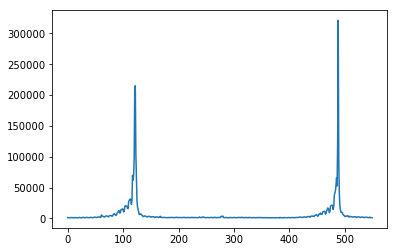

In [31]:
plt.plot(train[train.Page == "Halloween_en.wikipedia.org_desktop_all-agents"].values[0, 1:])

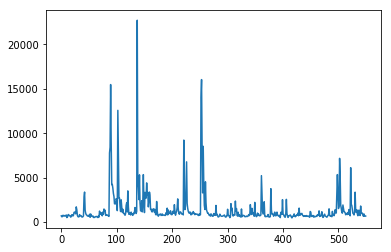

In [34]:
plt.plot(train[train.Page == 'Ursula_von_der_Leyen_de.wikipedia.org_all-access_all-agents'].values[0,1:])